In [2]:
import pandas as pd
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import csv
import glob  
import tensorflow as tf

In [3]:
T_sync=[]
Ini_csv=[]
path1 = '*.csv'
files=glob.glob(path1)
for f in files:
    if '_TimeSync.csv' in f:
        T_sync.append(f)
    elif '_TimeSync_1.csv' in f:
        T_sync.append(f)
    else:
        Ini_csv.append(f)

T_sync.sort();
Ini_csv.sort();
print(T_sync)
print(Ini_csv)

start_time=[]
stop_time=[]
for t in Ini_csv:
    with open(t, newline='') as f:
        reader = csv.reader(f)
        for row in reader:       
            print(row)
        start_time.append(row[4])
        stop_time.append(row[5])
        f.close()
print(start_time)
print(stop_time)

Total_Gestures=[]
Total_DeltaTime=[]
for count,t in enumerate (T_sync):
    with open(t, newline='') as f:
        reader = csv.reader(f)
        Gestures=[]
        DeltaTimes=[]
        i=0
        for row in reader: 
            if i==1:
                Gesture=row[0]
                CurrentTime=row[1]
                DeltaTime=int(CurrentTime)-int(start_time[count])
                Gestures.append(Gesture)
                DeltaTimes.append(DeltaTime)
            i=1
        Total_Gestures.append(Gestures)
        Total_DeltaTime.append(DeltaTimes)
        f.close()
print(len(Total_Gestures))


['st145634_TimeSync.csv', 'st152833_TimeSync.csv', 'st152839_TimeSync.csv', 'st152840_TimeSync.csv', 'st152867_TimeSync.csv', 'st152881_TimeSync.csv', 'st152939_TimeSync.csv', 'st152961_TimeSync.csv', 'st153005_TimeSync.csv', 'st153063_TimeSync.csv', 'st153573_TimeSync.csv', 'st158058_TimeSync.csv', 'st158208_TimeSync.csv', 'st158409_TimeSync.csv', 'st158522_TimeSync.csv', 'st158671_TimeSync.csv', 'st158767_TimeSync.csv', 'st158777_TimeSync.csv', 'st158788_TimeSync.csv', 'st158823_TimeSync.csv', 'st158830_TimeSync.csv', 'st158956_TimeSync.csv', 'st158982_TimeSync.csv', 'st158991_TimeSync.csv', 'st159017_TimeSync.csv', 'st159017_TimeSync_1.csv', 'st159103_TimeSync.csv', 'st159123_TimeSync.csv', 'st159217_TimeSync.csv', 'st159237_TimeSync.csv', 'st159254_TimeSync.csv', 'st159343_TimeSync.csv', 'st159603_TimeSync.csv', 'st159630_TimeSync.csv', 'st362203_TimeSync.csv']
['st145634.csv', 'st152833.csv', 'st152839.csv', 'st152840.csv', 'st152867.csv', 'st152881.csv', 'st152939.csv', 'st152961

In [4]:
Total_Ges1=[]
i=0
for Gest1 in Total_Gestures:    
    Ges1=[]
    Ges2=[]
    flg=0
    flg1=1
    for k in Gest1:
        if flg==1:
            a,b=k.split('_',1)
            if flg1==1:
                Ges1.append(a)
                flg1=0
            else:
                flg1=1
            Ges2.append(b)
        flg=1
        
    Total_Ges1.append(Ges1)
    i=i+1
print(Total_Ges1)

Total_Start_ti=[]
Total_Stop_ti=[]
for DeltaTimes in Total_DeltaTime:
    Start_ti=[]
    Stop_ti=[]
    flg=1
    for k in DeltaTimes:
        if flg==1:
            Start_ti.append(k)
            flg=0
        elif flg==0:
            Stop_ti.append(k)
            flg=1
    Total_Start_ti.append(Start_ti)
    Total_Stop_ti.append(Stop_ti)
print(Total_Start_ti)
print(Total_Stop_ti)

Total_Label_TS=[]
Label_TS_temp=[]

flg=0
i=0

for Gest_sample,t_start,t_stop in zip(Total_Ges1,Total_Start_ti,Total_Stop_ti):
    Label_TS=[]
    for k,t1,t2 in zip(Gest_sample,t_start,t_stop):
        if flg==0:
            Label_TS_temp=[k,t1,t2]
            Label_TS.append(Label_TS_temp)
    Total_Label_TS.append(Label_TS)
len(Total_Label_TS)


[['Circle', 'Circle', 'Noise', 'Equal', 'Plus', 'Plus', 'Tap', 'V', 'V', 'Divide', 'Double', 'Plus', 'Eleven', 'Divide', 'One', 'Eleven', 'V', 'One', 'Eleven', 'Noise', 'Double', 'Divide', 'Divide', 'Plus', 'Divide', 'Divide', 'Double', 'Divide', 'Eleven', 'Tap', 'Eleven', 'Noise', 'Plus', 'Tap', 'Minus', 'Tap', 'Minus', 'One', 'V', 'Circle', 'Equal', 'Plus', 'V', 'Plus', 'Plus', 'V', 'V', 'Circle', 'Tap', 'Plus', 'Tap', 'Divide', 'Equal', 'Tap', 'Divide', 'Noise', 'Divide', 'Tap', 'One', 'Eleven', 'Divide', 'Noise', 'Divide', 'Noise', 'Eleven', 'Noise', 'Noise', 'V', 'One', 'Divide', 'Plus', 'V', 'Divide', 'Divide', 'Tap', 'V', 'Divide', 'V', 'Tap', 'Minus', 'V', 'Plus', 'Noise', 'Tap', 'Minus', 'Divide', 'Circle', 'Tap', 'One', 'Tap', 'Plus', 'Equal', 'Eleven', 'Circle', 'Noise', 'Divide', 'Plus', 'Divide', 'Equal', 'Double', 'One', 'Equal', 'Noise', 'V', 'Tap', 'Tap', 'Noise', 'V', 'One', 'Noise', 'Double', 'Tap', 'One', 'Eleven', 'Plus', 'One', 'Circle', 'Eleven', 'Noise', 'V', 'Eq

35

In [5]:
Total_data=[]
path2 = '*.wav'
files=glob.glob(path2)
files.sort();
for f in files:
    fs,data=wavfile.read(f);
    Total_data.append(data)
    #print(f)
Total_data

Total_data1=[]
Total_data2=[]
for t_data in Total_data:
    Total_data1.append(t_data[:,0])
    Total_data2.append(t_data[:,1])

In [6]:
len(Total_Label_TS)

35

In [7]:
    
"""
Circle  ---1
Plus    ---2
V       ---3
Double  ---4
One     ---5
Divide  ---6
Noise   ---7


"""
label={'Circle':1,'Plus':2,'V':3,'Double':4,'One':5,'Divide':6,'Noise':7}
invlabel=dict([[v,k] for k,v in label.items()])
Data_withLabel=[]
Data_withLabel1=[]
temp=[]
temp1=[]

data_temp=[]
data_temp1=[]
label_check=[]

X_data_temp=[]
X_data_temp1=[]
X_data_circle=[]
X_data_circle1=[]
X_data_plus=[]
X_data_plus1=[]
X_data_double=[]
X_data_double1=[]
X_data_one=[]
X_data_one1=[]
X_data_divide=[]
X_data_divide1=[]
X_data_v=[]
X_data_v1=[]
X_data_noise=[]
X_data_noise1=[]
i=0
j=0
Case_Sw=None

for t_data1,t_data2,t_Label_TS in zip(Total_data1,Total_data2,Total_Label_TS):
     for j in range(0,len(t_Label_TS),1):
        start=float(t_Label_TS[j][1])*44.1
        stop= float(t_Label_TS[j][2])*44.1
        Case_Sw=t_Label_TS[j][0]
        X_data_temp=t_data1[int(start+10000):int(stop-10000)]
        X_data_temp1=t_data2[int(start+10000):int(stop-10000)]
        for t in range (0, len(X_data_temp),16):
                data_temp.append(X_data_temp[t])
                data_temp1.append(X_data_temp1[t])
        X_data_temp=data_temp
        X_data_temp1=data_temp1
        data_temp=[]
        data_temp1=[]
        if Case_Sw == "Circle":
            X_data_circle.append(X_data_temp)
            X_data_circle1.append(X_data_temp1)
            temp=[X_data_temp,label[Case_Sw]]
            Data_withLabel.append(temp)
            label_check.append(Case_Sw)
            temp1=[X_data_temp1,label[Case_Sw]]
            Data_withLabel1.append(temp1)
            temp=[]
            temp1=[]
        elif Case_Sw=="Plus":
            X_data_plus.append(X_data_temp)
            X_data_plus1.append(X_data_temp1)
            temp=[X_data_temp,label[Case_Sw]]
            Data_withLabel.append(temp)
            label_check.append(Case_Sw)
            temp1=[X_data_temp1,label[Case_Sw]]
            Data_withLabel1.append(temp1)
            temp=[]
            temp1=[]
        elif Case_Sw=="V":
            X_data_v.append(X_data_temp)
            X_data_v1.append(X_data_temp1)
            temp=[X_data_temp,label[Case_Sw]]
            Data_withLabel.append(temp)
            label_check.append(Case_Sw)
            temp1=[X_data_temp1,label[Case_Sw]]
            Data_withLabel1.append(temp1)
            temp=[]
            temp1=[]
        elif Case_Sw=="Double":
            X_data_double.append(X_data_temp)
            X_data_double1.append(X_data_temp1)
            temp=[X_data_temp,label[Case_Sw]]
            Data_withLabel.append(temp)
            label_check.append(Case_Sw)
            temp1=[X_data_temp1,label[Case_Sw]]
            Data_withLabel1.append(temp1)
            temp=[]
            temp1=[]
        elif Case_Sw=="One":
            X_data_one.append(X_data_temp)
            X_data_one1.append(X_data_temp1)
            temp=[X_data_temp,label[Case_Sw]]
            Data_withLabel.append(temp)
            label_check.append(Case_Sw)
            temp1=[X_data_temp1,label[Case_Sw]]
            Data_withLabel1.append(temp1)
            temp=[]
            temp1=[]
        elif Case_Sw=="Divide":
            X_data_divide.append(X_data_temp)
            X_data_divide1.append(X_data_temp1)
            temp=[X_data_temp,label[Case_Sw]]
            Data_withLabel.append(temp)
            label_check.append(Case_Sw)
            temp1=[X_data_temp1,label[Case_Sw]]
            Data_withLabel1.append(temp1)
            temp=[]
            temp1=[]
        elif Case_Sw=="Noise":
            X_data_divide.append(X_data_temp)
            X_data_divide1.append(X_data_temp1)
            temp=[X_data_temp,label[Case_Sw]]
            Data_withLabel.append(temp)
            label_check.append(Case_Sw)
            temp1=[X_data_temp1,label[Case_Sw]]
            Data_withLabel1.append(temp1)
            temp=[]
            temp1=[]
    
               


In [8]:
len(Data_withLabel)

7464

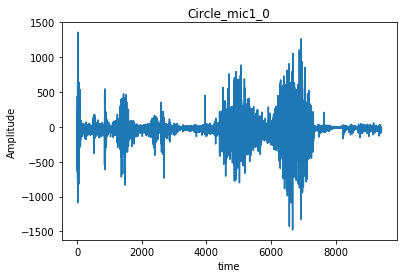

9406


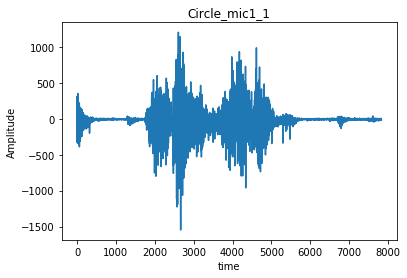

7832


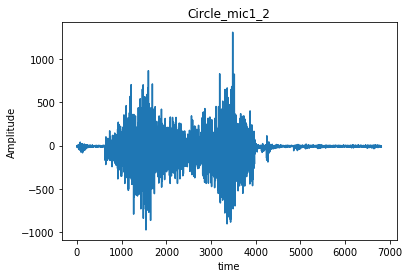

6810


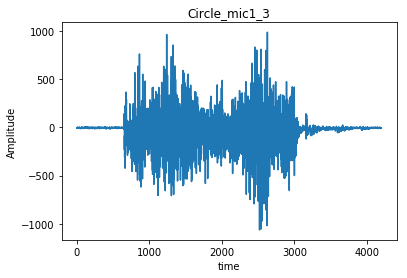

4202


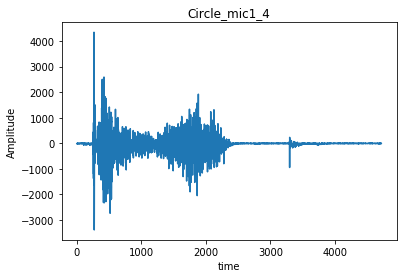

4723


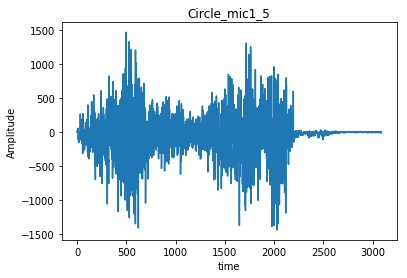

3089


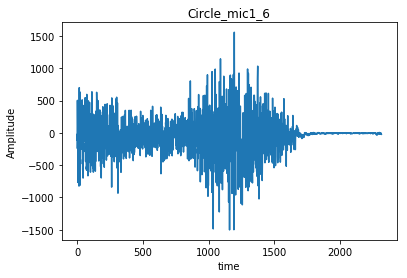

2314


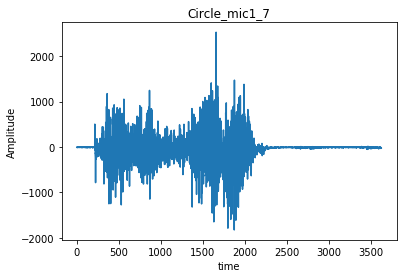

3624


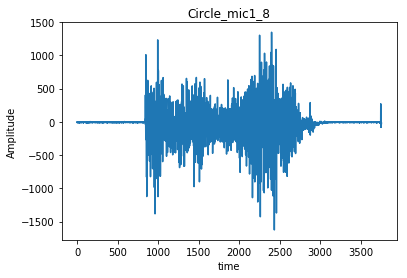

3759


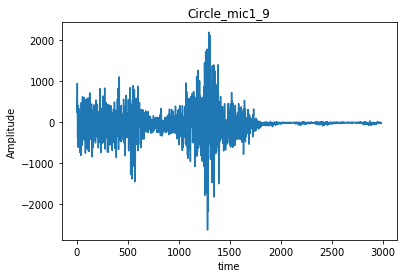

2984


In [9]:
for j in range(0,10,1):
    plt.plot(X_data_circle[j])
    plt.ylabel('Amplitude')
    plt.xlabel('time')
    plt.title("Circle_mic1"+'_'+str(j))
    plt.show()
    print(len(X_data_circle[j]))

In [10]:
x_label_totmic1, y_label_tot = map(list, zip(*Data_withLabel))
x_label_totmic2, y_label_tot_dummy = map(list, zip(*Data_withLabel1))

y_label_tot=np.array(y_label_tot)
y_train=pd.get_dummies(y_label_tot).values

In [11]:
y_train.shape

(7464, 7)

In [12]:
x_label_tot1=x_label_totmic1
x_label_tot2=x_label_totmic2

n_train=len(x_label_tot1)-1500
n_total=len(x_label_tot1)

In [13]:
n_train

5964

In [20]:
x_label_tot1_train=[]
x_label_tot2_train=[]
for j in range(0,n_train,1):
    temp_train1 = x_label_tot1[j][0:6000]
    temp_train2 = x_label_tot2[j][0:6000]
    x_label_tot1_train.append(temp_train1)
    x_label_tot2_train.append(temp_train2)

x_label_tot1_test=[]
x_label_tot2_test=[]
for j in range(n_train,n_total,1):
    temp_test1 = x_label_tot1[j][0:6000]
    temp_test2 = x_label_tot2[j][0:6000]
    x_label_tot1_test.append(temp_test1)
    x_label_tot2_test.append(temp_test2)


In [15]:
X_train1=x_label_tot1_train
X_train2=x_label_tot2_train
X_test1=x_label_tot1_test
X_test2=x_label_tot2_test

y_train1=y_train[0:n_train]
y_test1=y_train[n_train:n_total]

In [16]:
length = len(sorted(X_train1,key=len, reverse=True)[0])
X_train=np.array([xi+[0]*(length-len(xi)) for xi in X_train1])
print(X_train.shape)

length = len(sorted(X_test1,key=len, reverse=True)[0])
X_test=np.array([xi+[0]*(length-len(xi)) for xi in X_test1])
X_test.shape

(5964, 6000)


(1500, 6000)

In [17]:
X_train_CNN = np.expand_dims(X_train, axis=2)
X_test_CNN = np.expand_dims(X_test, axis=2)

In [18]:
Y_train=np.array(y_train1)
Y_test=np.array(y_test1)

print(Y_test.shape)
print(Y_train.shape)

(1500, 7)
(5964, 7)


In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.layers import GRU
from keras.layers.normalization import BatchNormalization

config = tf.ConfigProto(log_device_placement=True, allow_soft_placement=True, device_count = {'GPU' : 4})
config.gpu_options.allow_growth=True
#config.gpu_options.per_process_gpu_memory_fraction=0.40
config.gpu_options.allocator_type = 'BFC'
with tf.device('/gpu:0'):
    session = tf.Session(config=config)
    tf.keras.backend.set_session
    
    model = Sequential()

    model.add(Conv1D(32,3, activation='relu', input_shape=(6000, 1)))
    model.add(BatchNormalization())
    
    model.add(MaxPooling1D(3))
    
    model.add(Conv1D(32, 3, activation='relu'))
    model.add(BatchNormalization())

    model.add(GRU(64,return_sequences=True))
    model.add(BatchNormalization())
    
    model.add(MaxPooling1D(35))
    model.add(Flatten())
    
    model.add(Dense(units = 128, activation='relu'))

    model.add(Dense(7, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])

    history=model.fit(X_train_CNN, Y_train, batch_size=64,shuffle=True, epochs=15,verbose=1,validation_data=(X_test_CNN, Y_test))

    score, acc = model.evaluate(X_test_CNN, Y_test, batch_size=16)
    print(acc)

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 5998, 32)          128       
_________________________________________________________________
batch_normalization_1 (Batch (None, 5998, 32)          128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1999, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1997, 32)          3104      
_________________________________________________________________
batch_normalization_2 (Batch (None, 1997, 32)          128       
_________________________________________________________________
gru_1 (GRU)                  (None, 1997, 64)          18624     
_________________________________________________________________
batch_normalization_3 (Batch (None, 1997, 64)          256       
__________

In [31]:
from sklearn.metrics import confusion_matrix
pred_classes=model.predict_classes(X_test_CNN)
num_ytest=[ np.where(r==1)[0][0] for r in Y_test ]
num_ytest
confusion=confusion_matrix(num_ytest,pred_classes)
confusion

array([[163,   2,   7,   5,  26,   5,  17],
       [  1, 150,  28,  10,  22,  13,   5],
       [  5,  12, 140,  11,  31,   7,   5],
       [  1,   2,   2, 197,  21,   6,   3],
       [  4,   9,   6,   6, 179,   5,   1],
       [  4,   9,  10,  10,  15, 132,   8],
       [ 30,  11,  17,   5,   8,  22, 112]])

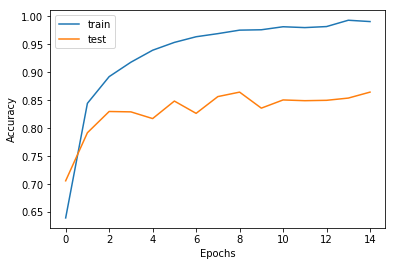

In [43]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

In [1]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

NameError: name 'plt' is not defined

In [22]:
model.save('CNN_GRU.h5')